# Part A - Question 3

**Un-Supervised Learning Algorithms - K-Means Clustering:** Build a K-Means Model for the given dataset. Build a K-Means Model for the given Dataset. Use the Elbow or Silhouette method to find the best possible K-value. Use the cost function as WCSS(Within Cluster Sum of Squares). Curate a new data point and find which cluster it goes to. Write the inference. 

## Handcode

In [2]:
import numpy as np

In [3]:
from scipy.spatial.distance import cdist


class KMeans:
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        for i in range(self.max_iterations):
            # Step 1: Assign clusters to points
            distances = cdist(X, self.centroids)
            cluster_labels = np.argmin(distances, axis=1)
            
            # Step 2: Update centroids
            for j in range(self.k):
                mask = cluster_labels == j
                if np.sum(mask) > 0:
                    self.centroids[j,:] = np.mean(X[mask, :], axis=0)
    
    def predict(self, X):
        distances = cdist(X, self.centroids)
        cluster_labels = np.argmin(distances, axis=1)
        return cluster_labels

In [4]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

kmeans = KMeans(k=3)
kmeans.fit(X)


In [5]:
labels = kmeans.predict(X)
labels

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0], dtype=int64)

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def elbow_method(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(i)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

c:\Users\MXNXV-ERR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MXNXV-ERR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MXNXV-ERR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MXNXV-ERR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

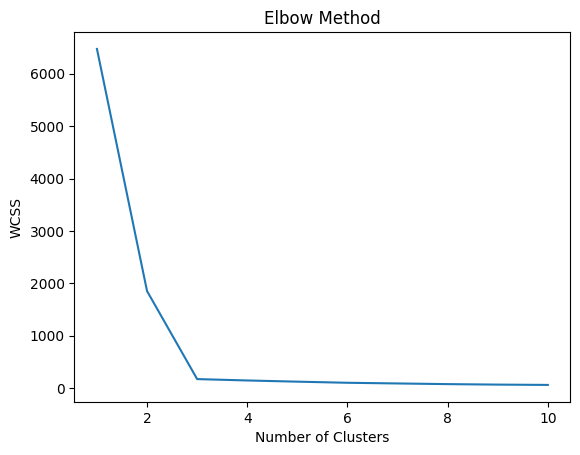

In [7]:
elbow_method(X)

In [12]:
from sklearn import metrics
def silhouette_method(X):
    silhouette_scores = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        silhouette_scores.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    plt.plot(range(2, 11), silhouette_scores)
    plt.title('Silhouette Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

c:\Users\MXNXV-ERR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MXNXV-ERR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MXNXV-ERR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\MXNXV-ERR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

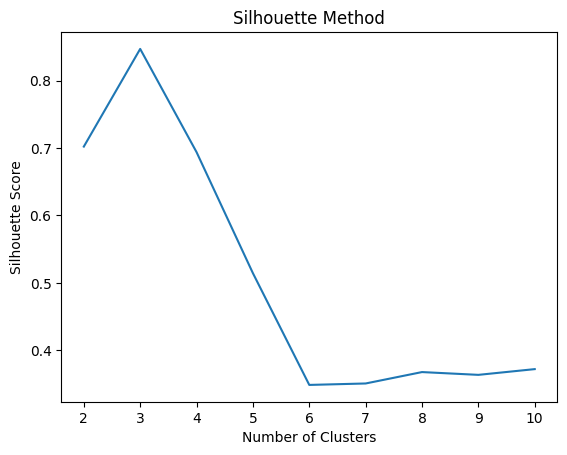

In [13]:
silhouette_method(X)